In [1]:
import sys
sys.path.append("/home/wangyf/Documents/codes/TrajectoryDataMining_codes/")
import numpy as np
import pandas as pd
import  os
import time
import matplotlib.pyplot as plt
root = "/home/wangyf/Documents/codes/TrajectoryDataMining_codes"
print(os.getcwd())
# load data
df1 = pd.read_csv(root + "/datasets/MoveBank/Grey-headed flying fox, Adelaide, 2015-2018-reference-data.csv")
df2 = pd.read_csv(root + "/datasets/MoveBank/Grey-headed flying fox, Adelaide, 2015-2018.csv")
df2_indexes = list(df2['tag-local-identifier'].value_counts().index)
df2[df2_indexes[0] == df2['tag-local-identifier']]


def split_data(df, distinct_col='tag-local-identifier', cols_selection=['timestamp', 'location-long', 'location-lat']):
    df_indexes = list(df[distinct_col].value_counts().index)
    results = dict()
    for index in df_indexes:
        df_tmp = df[df[distinct_col] == index]
        results[index] = df_tmp[cols_selection]
    return results


results_ = split_data(df2)
result = dict()
traj = []
trajt = []
for i in range(4):
    id = list(results_.keys())[i]
    # print(id)
    day = results_[id].copy()
    day['timestamp_'] = day['timestamp'].copy()
    day['timestamp'] = day['timestamp'].map(lambda x: x[:10])

    date_set = sorted(list(set(day['timestamp'])))
    result_ = dict()
    for date in date_set:
        # print(date)
        result_[date] = day[day['timestamp'] == date]
        result[id] = result_
        res = result[id][date]
        result_tmp = []
        cmd_time = []
        for idx, row in res.iterrows():
            result_tmp.append([row['location-long'], row['location-lat']])
            cmd_time.append([row['timestamp_']])
        if 0 == len(result_tmp):
            print(i, date)
        if 500 < len(result_tmp):
            traj.append(result_tmp)
            trajt.append(cmd_time)


def get_timestamp(str_time):
    tmp_ = time.strptime(str_time[:-4], "%Y-%m-%d %H:%M:%S")
    tmp_ = time.mktime(tmp_)
    return tmp_


def convert_traj_time_from_start(time_str_):
    time_tmp = [get_timestamp(x) for x in time_str_]
    time_tmp_start = time_tmp[0]
    time_tmp = [x - time_tmp_start for x in time_tmp]
    return time_tmp


result_tmp = []
for idx, traj_ in enumerate(trajt):  # 遍历每一条轨迹
    time_list = [x[0] for x in traj_]  # 获取时间列表
    # print(time_list)
    time_from_start_list = convert_traj_time_from_start(time_list)
    result_tmp.append(time_from_start_list)
traj_time = result_tmp

anomoly_flying_fox = [1, 21, 24, 26, 34, 38, 41, 45, 46, 47, 48]
labels = np.ones(62)

/home/wangyf/Documents/codes/TrajectoryDataMining_codes/codes/Algorithm2


In [2]:
alltjlist = []
for i in range(len(traj)):
    #if i!= 26:
    #if i not in anomoly_curlews:
    if i not in anomoly_flying_fox:
        alltjlist.append(traj[i])

In [3]:
from codes.Algorithm1.iNNE_IK import iNN_IK
inne_ik = iNN_IK(2**12, 100)

In [4]:
D_idx = [0]    # index of each distributions
alldata = []
n = len(alltjlist)
for i in range(1, n+1):
    D_idx.append(D_idx[i-1]+len(alltjlist[i-1]))
    alldata +=  alltjlist[i-1]
alldata = np.array(alldata)

In [5]:
inne_ik.fit(alldata)

In [6]:
def get_ano_sub(inne_ik,anotraj):
    idk_map = inne_ik.transform_1(np.array(anotraj))
    mean_map = np.mean(idk_map,axis = 0)
    score = np.dot(idk_map, mean_map.T)
    anopoint = []
    n = len(anotraj)
    # n = len(score)
    for i in range(n):
        if score[i] == 0:
            anopoint.append(i)
    subtrajs = []
    sub = []

    if 0 == len(anopoint):
        sub.append(0)
        sub.append(n-1)
        subtrajs.append(sub)
        return subtrajs, [i for i in range(n)]

    sub.append(anopoint[0])
    for i in range(1,len(anopoint),1):
        if(anopoint[i] - anopoint[i-1] > 1):
            sub.append(anopoint[i-1])
            if(sub[1] - sub[0] >= int(0.03*n)):
                subtrajs.append(sub)
            sub = []
            sub.append(anopoint[i])
    sub.append(anopoint[-1])
    if(sub[1] - sub[0] >= int(0.03*n)):
            subtrajs.append(sub)
    if 0 == len(subtrajs):
        sub.append(0)
        sub.append(n-1)
        subtrajs.append(sub)
    return subtrajs, anopoint

## An Example 

In [10]:
subtrajs_1,anopoint_1 = get_ano_sub(inne_ik, traj[1]) # anomalous trajectory 1
subtrajs_26,anopoint_26 = get_ano_sub(inne_ik,traj[26]) # anomalous trajectory 26

(138.479656225, 138.690219875, -35.007321743999995, -34.846159556)

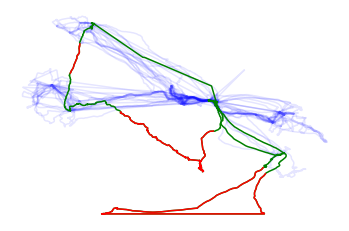

In [11]:
for i in range(62):
    if i not in anomoly_flying_fox :
        x = np.array(traj[ i ]).T[ 0 ]
        y = np.array(traj[ i ]).T[ 1 ]
        plt.plot(x, y, color="b", alpha=0.1, label="normal")
# x = np.array(traj[26]).T[ 0 ]
# y = np.array(traj[26]).T[ 1 ]
# plt.plot(x, y, color="g",  label="normal")
x = np.array(traj[1]).T[ 0 ]
y = np.array(traj[1]).T[ 1 ]
plt.plot(x, y, color="g",  label="normal")
# plt.annotate('Q$_1$',(138.5193176,-34.89564896),xytext=(138.5023176,-34.87564896),fontsize=20,arrowprops =dict(arrowstyle='->'))
# plt.annotate('Q$_2$',(138.5745697,-34.99850464),xytext=(138.5416168,-34.97089005),fontsize=20,arrowprops =dict(arrowstyle='->'))
# x = np.array(traj[45]).T[ 0 ][350:]
# y = np.array(traj[45]).T[ 1 ][350:]
# plt.plot(x, y, color="r", label="normal")
for i in range(len(subtrajs_1)):
    x = np.array(traj[1]).T[ 0 ][subtrajs_1[i][0]:subtrajs_1[i][1]]
    y = np.array(traj[1]).T[ 1 ][subtrajs_1[i][0]:subtrajs_1[i][1]]
    plt.plot(x, y, color="r", label="normal")
x = np.array(traj[26]).T[ 0 ]
y = np.array(traj[26]).T[ 1 ]
plt.plot(x, y, color="g",  label="normal")
# plt.annotate('Q$_1$',(138.5193176,-34.89564896),xytext=(138.5023176,-34.87564896),fontsize=20,arrowprops =dict(arrowstyle='->'))
# plt.annotate('Q$_2$',(138.5745697,-34.99850464),xytext=(138.5416168,-34.97089005),fontsize=20,arrowprops =dict(arrowstyle='->'))
# x = np.array(traj[45]).T[ 0 ][350:]
# y = np.array(traj[45]).T[ 1 ][350:]
# plt.plot(x, y, color="r", label="normal")
for i in range(len(subtrajs_26)):
    x = np.array(traj[26]).T[ 0 ][subtrajs_26[i][0]:subtrajs_26[i][1]]
    y = np.array(traj[26]).T[ 1 ][subtrajs_26[i][0]:subtrajs_26[i][1]]
    plt.plot(x, y, color="r", label="normal")
plt.axis('off')